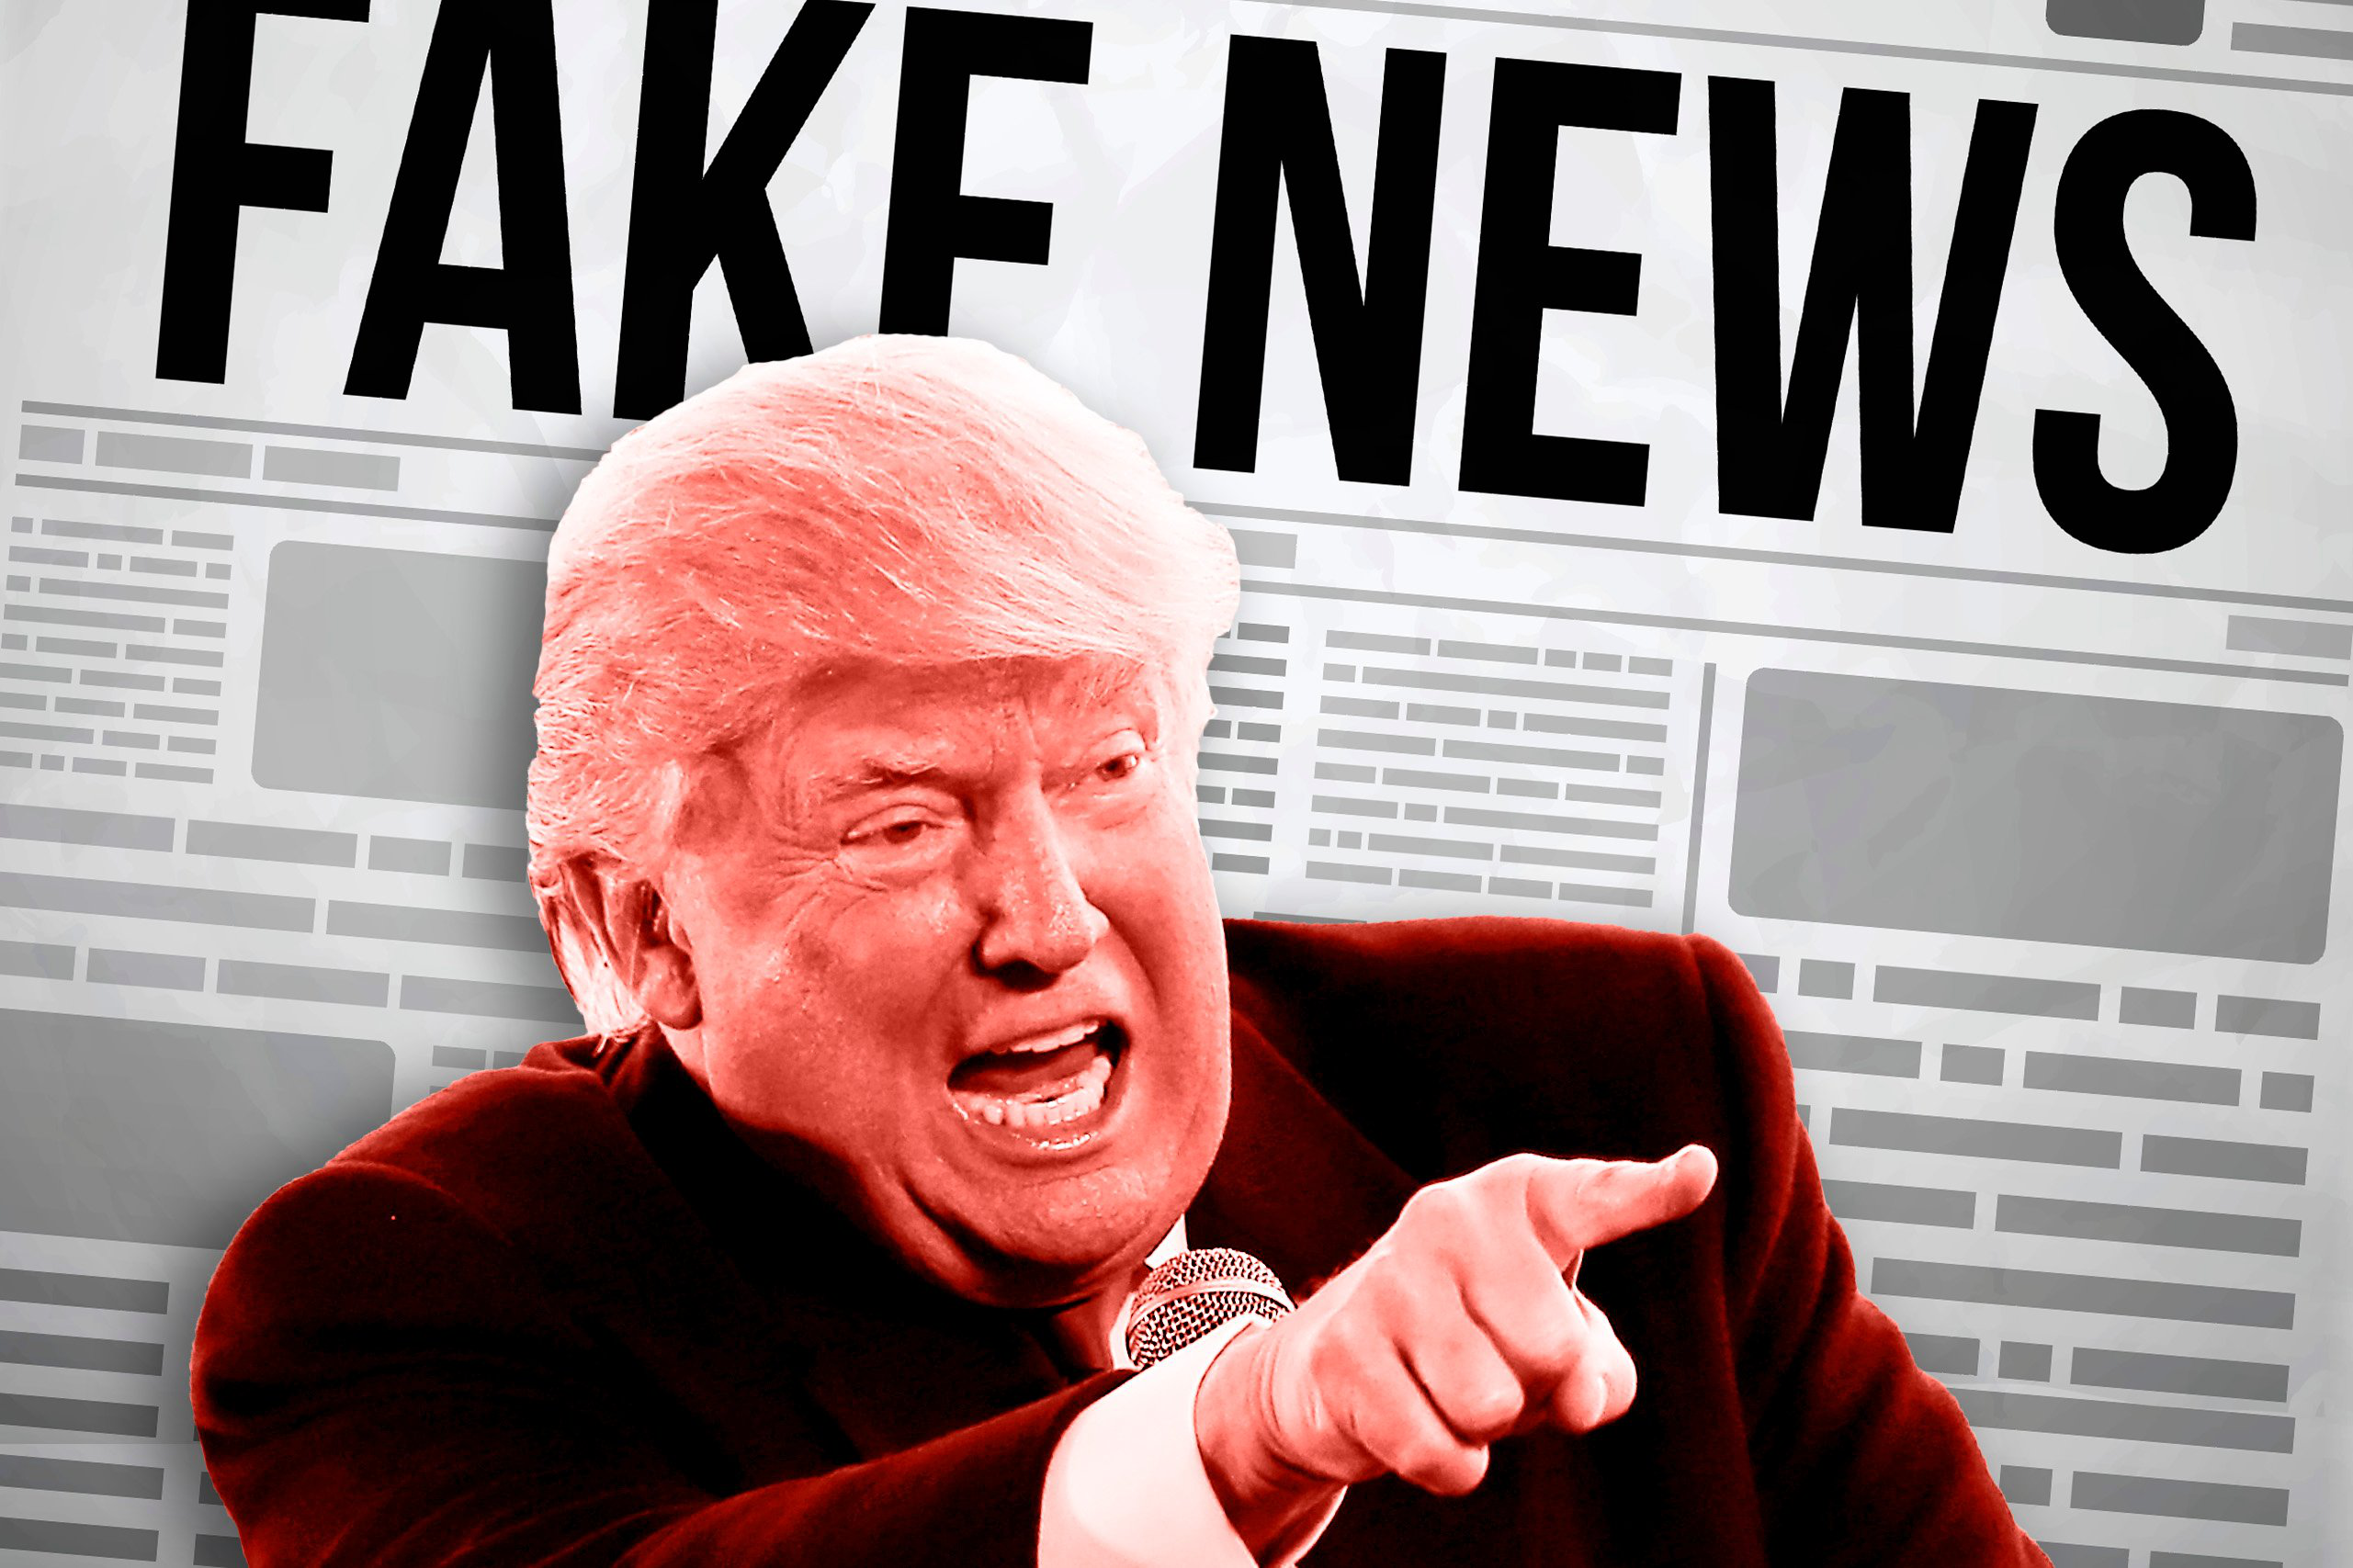

In [1]:
from PIL import Image
img = Image.open('170217-whitney-trump-fake-news-tease_w0o5oa.jpg')
img

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Fake data

In [3]:
df1 = pd.read_csv("Fake[1].csv")

### Giving target as 0

In [4]:
df1['Target'] = 0

In [5]:
df1.isnull().any()

title      False
text       False
subject    False
date       False
Target     False
dtype: bool

### Data Visualization

C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


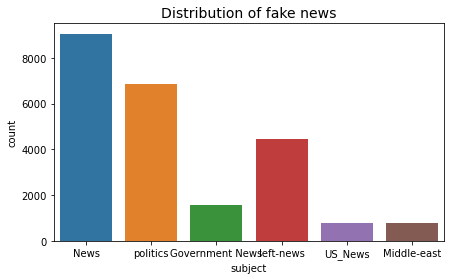

In [10]:
#countplot for subject on fake news
plt.rcParams['figure.figsize'] = (7, 4)
sns.countplot('subject', data=df1)
plt.title("Distribution of fake news", fontsize = 14)
plt.show()

In [11]:
df1['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

### True data

In [12]:
df2 = pd.read_csv("True[1].csv")
df2.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [13]:
df2['Target'] = 1 #assigning target as 1

***0 represents fack***
***1 represents true***

C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


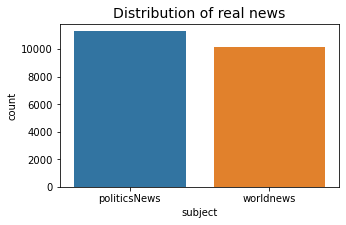

In [14]:
#subject distribution of real news
plt.rcParams['figure.figsize'] = (5, 3)
sns.countplot('subject', data=df2)
plt.title('Distribution of real news', fontsize=14)
plt.show()

***So there is fake news on 5 different subjects where as true news is in 2 subjects***

In [15]:
#merging the real and fack data
rf = pd.concat([df1, df2], axis=0)

In [16]:
rf.shape

(44898, 5)

In [17]:
#!pip install  WordCloud

### Lets see important words in real data using wordcloud

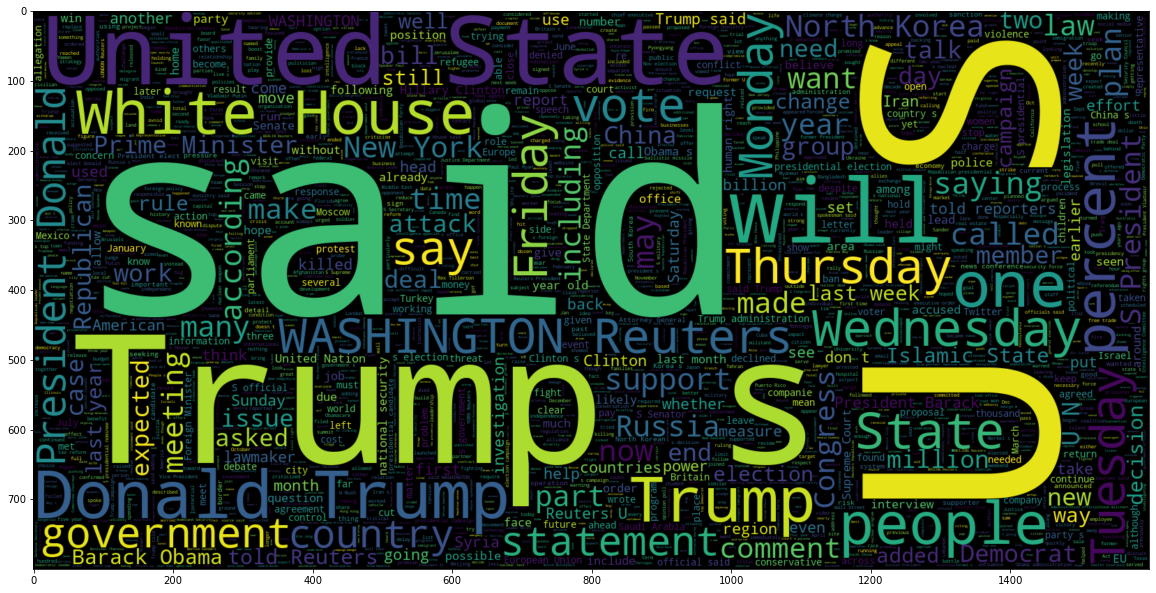

In [230]:
#word cloud for real news
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 ).generate(" ".join(rf[rf.Target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

### Lets see important words in fack data using wordcloud

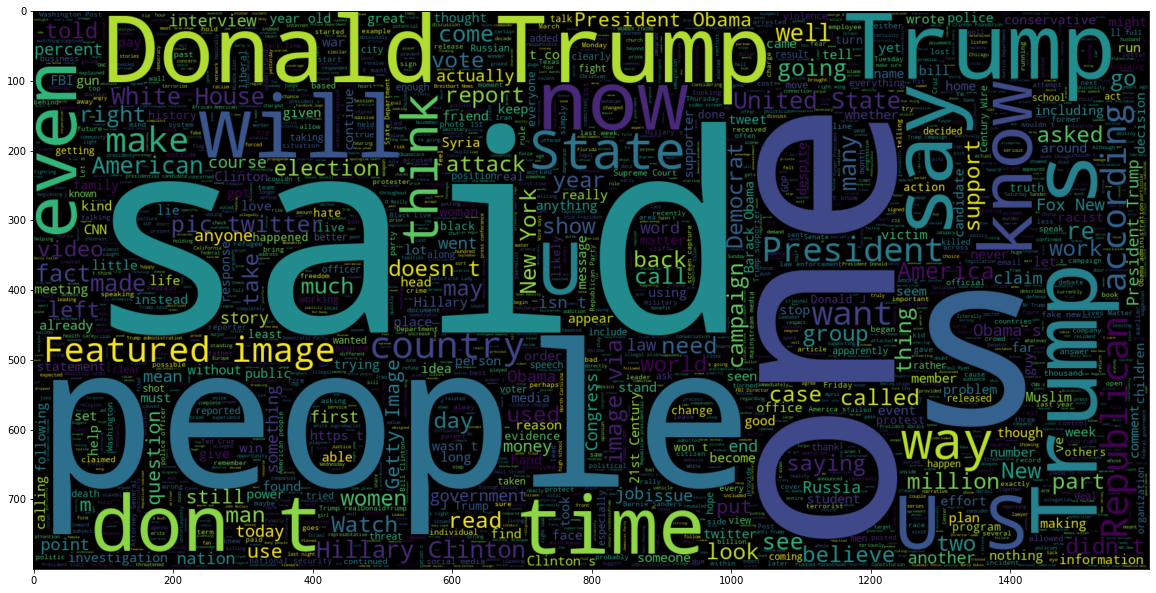

In [231]:
plt.figure(figsize = (20,20)) # Text that is fack
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 ).generate(" ".join(rf[rf.Target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

In [18]:
#checking the null values
rf.isnull().any()

title      False
text       False
subject    False
date       False
Target     False
dtype: bool

In [19]:
rf['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


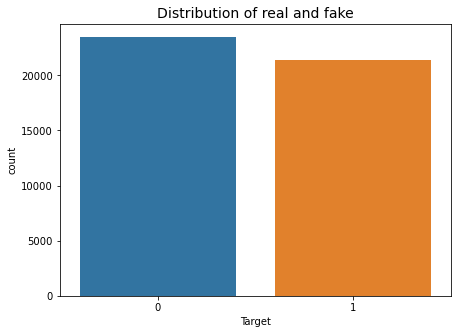

In [20]:
#count plot distribution of real and fack news
plt.rcParams['figure.figsize']=(7, 5)
sns.countplot('Target',data=rf)
plt.title("Distribution of real and fake", fontsize=14)
plt.show()

***So there is little more fack data comparing with true data but it is very little in margin so our target is not that baised***

In [21]:
rf = rf.sort_values(by=['date'])

### Feature selection

***SO I'm gonna drop 3 features from data "title", "date" and "subject"***

***Beacause...***

***We cant decide some news or any topic justbby reading Title, ahh well..we can but not machine. Machine needs more data to give accurate results. Here machine has to decide weather its fack or real and with same reason I'm dropping other features too...***

***Now I'm gonna train my model on text...so lets begin...!!!!***

In [22]:
#droping features
rf.drop('title', axis=1, inplace=True)
rf.drop('date', axis=1, inplace=True)
rf.drop('subject', axis=1, inplace=True)

In [23]:
rf.head(3)

text  Target
9084  We ve been covering the curious case of DOJ of...       0
9083  Yesterday, a second U.S. judge on Tuesday bloc...       0
9082  Rapper Jay-Z attended the Peace Walk & Peace T...       0

In [24]:
rf.head()

text  Target
9084  We ve been covering the curious case of DOJ of...       0
9083  Yesterday, a second U.S. judge on Tuesday bloc...       0
9082  Rapper Jay-Z attended the Peace Walk & Peace T...       0
9081  WHO BETTER THAN A FORMER POLICE OFFICER TO UND...       0
9080  How could the Senate be so lame in their effor...       0

In [30]:
rf.text[0]

0    Donald Trump just couldn t wish all Americans ...
0    WASHINGTON (Reuters) - The head of a conservat...
Name: text, dtype: object

In [25]:
rf1 = rf.copy()

In [26]:
rf1['length']=rf1['text'].apply(len)
rf1.head(20)

text  Target  length
9084  We ve been covering the curious case of DOJ of...       0    3815
9083  Yesterday, a second U.S. judge on Tuesday bloc...       0    4100
9082  Rapper Jay-Z attended the Peace Walk & Peace T...       0    1736
9081  WHO BETTER THAN A FORMER POLICE OFFICER TO UND...       0    1351
9080  How could the Senate be so lame in their effor...       0    2074
9079  WQOW -A Lacrosse, WI transgender person, who r...       0    1560
9078  What s wrong with Pelosi? Nancy Pelosi is supp...       0    2281
9077  The mainstream media is guilty of fake news wh...       0    1940
9076  ABC News  When two Marjory Stoneman Douglas Hi...       0    1835
9075  The heartbreaking story of two parents who put...       0    1936
9067  According to Fox News  A federal grand jury on...       0    2840
9068   President Trump visits Florida hospital, prai...       0    2659
9069  While the left points the finger at guns, guns...       0    1238
9070  The left has locked onto a stat that 18 school...       0    2656
9071  Tucker Carlson weighed in on the hysteria over...       0    1208
9072  Just what we need another Trump-bashing RINO. ...       0     902
9074  Susan Rice and Obama were as thick as thieves ...       0    1535
9073  When it gets down to it, what this sheriff sai...       0    1658
9064  The hero football coach who threw himself betw...       0    1439
9060   We took a very hard look at these numbers, an...       0     772

In [27]:
rf1.length.describe()

count    44898.000000
mean      2469.109693
std       2171.617091
min          1.000000
25%       1234.000000
50%       2186.000000
75%       3105.000000
max      51794.000000
Name: length, dtype: float64

In [28]:
rf1[rf1['length']==772]['text'].iloc[0]

' We took a very hard look at these numbers, and we did find that Minnesota has a very high rate of gun ownership   one of the highest in the country   but it has a relatively low rate of violent crime,  revealed Minneapolis station WCCO reporter Pat Kessler in a segment Thursday.He added that in 2017, Minnesota  set a new record for firearms background checks,  processing 473,975 checks on permits, 94,383 checks on handguns and 125,516 checks on long guns.Watch:In other words, more people attempted to purchase weapons in the state last year than ever before. Minnesota set another 2017 record, too,  his report continued.  The State Department of Public Safety reports 283,188 Minnesotans now have permits to legally carry firearms in public.    Conservative Tribune'

### Gonna import some libraries that requries in text preprocessing

***NLTK(Natural Language Toolkit)*** -  is a suite that contains libraries and programs for ***statistical language processing***. It is one of the most ***powerful NLP libraries, which contains packages*** to make machines understand human language and reply to it with an ***appropriate response.***

***Tokenization*** - is the process of tokenizing or ***splitting a string*** text into a list of tokens. One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph.

***stopwords*** - stop words are words which are ***filtered out before or after processing of natural language data (text)***.Though "stop words" usually refers to the ***most common words in a language,*** there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. ***Some tools specifically avoid removing these stop words to support phrase search.***

***Stemming & Lemmatization*** - are text ***normalization techniques*** for Natural Language Processing. These techniques are widely used for ***text preprocessing***. The ***difference*** between stemming and lemmatization is that ***stemming is faster as it cuts words without knowing the context***, while ***lemmatization is slower as it knows the context of words before processing.***. 

***TfidfVectorizer and CountVectorizer *** - both are methods for ***converting text data into vectors*** as model can process only numerical data.

In ***CountVectorizer we only count the number of times a word appears in the document*** which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.

***To overcome this , we use TfidfVectorizer .***

In TfidfVectorizer we consider ***overall document weightage*** of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

In [31]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string,re
from string import punctuation
from bs4 import BeautifulSoup
from html.parser import HTMLParser
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Krishna
[nltk_data]     Vamshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [33]:
#data cleaning
#ps = PorterStemmer()
#corpus = []
#for i in range(0, len(rf)):
    #soup = BeautifulSoup(rf, 'html.parser')
    #bool(soup)
    #sen = re.sub('[^a-zA-Z]',' ', rf['text'][i])
    #sen = re.sub('\[[^]]*\']',' ',rf['text'][i])#removing square brackets
    #sen = re.sub(r'http\S+',' ', rf['text'][i])#removing url from data
    #sen = sen.lower()
    #sen = sen.split()
    #sen = [ps.stem(word) for word in sen if not word in stop]#applying porter stemmer
    #sen = ' '.join(sen)
    #corpus.append(sen)

In [34]:
#cleaning the data
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
#removing square brackets
def remove_sqr_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
#removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)
#remove stopwords from data
def remove_stopwords(text):
    clean_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            clean_text.append(i.strip())
    return " ".join(clean_text)
#removing noise text
def remove_noise(text):
    text = strip_html(text)
    text = remove_sqr_brackets(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    return text
rf['text'] = rf['text'].apply(remove_noise)
            

C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://youtu.be/RTuxvWjH3a4" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=sWbYpIj7CQ8" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?feature=player_embedded&v=JebHe3049aA" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behi

C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=EOr9fwoc_mo" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=IPqrimR8GWw" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=aHkNzBRqPCE" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the UR

In [36]:
rf.head(3)

text  Target
9084  covering curious case DOJ official Bruce Ohr w...       0
9083  Yesterday, second U.S. judge Tuesday blocked P...       0
9082  Rapper Jay-Z attended Peace Walk Peace Talk Mi...       0

***I guess preprocessing is done***

In [37]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

In [38]:
corpus = get_corpus(rf.text)
corpus[:3]

['covering', 'curious', 'case']

***Now let's see its vector representation:***

In [39]:
#checking the top 10 most used words in data
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Trump': 101288,
 'said': 93137,
 'would': 54351,
 'U.S.': 46115,
 'people': 32968,
 'President': 32294,
 'also': 30314,
 'one': 29297,
 'Donald': 27015,
 'said.': 26195}

In [40]:
#Numerising the text using countvectorizer(bag of words)
from sklearn.feature_extraction.text import CountVectorizer

bow =CountVectorizer(max_features=2500, )

x=bow.fit_transform(rf["text"]).toarray()
y=rf["Target"]


In [286]:
x.shape

(44898, 2500)

In [287]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [288]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
accuracy =accuracy_score(y_test, y_pred)
print("Accuracy score is:",accuracy)

Accuracy score is: 0.950913140311804


In [289]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5575,  296],
       [ 255, 5099]], dtype=int64)

In [290]:
#perfoming the model 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rft = RandomForestClassifier(n_estimators = 600, 
                            criterion = 'entropy')
rft.fit(x_train, y_train)
y_pred = rft.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score is:",accuracy)

Accuracy score is: 0.9981291759465479


In [291]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5857,   14],
       [   7, 5347]], dtype=int64)

In [296]:
#Numerising the text using TFidfvectorizer
tfidf = TfidfVectorizer(max_features=2500)
x1 = tfidf.fit_transform(rf['text']).toarray()
y1 = rf["Target"]

In [297]:
#splitting the data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.25)

In [298]:
nb = MultinomialNB()
nb.fit(x1_train, y1_train)
y_pred = nb.predict(x1_test)
accuracy =accuracy_score(y1_test, y_pred)
print("Accuracy score is:",accuracy)

Accuracy score is: 0.9349665924276169


In [300]:
cm = confusion_matrix(y1_test, y_pred)
cm

array([[5892,   14],
       [   7, 5312]], dtype=int64)

In [299]:
rft = RandomForestClassifier(n_estimators = 600, 
                            criterion = 'entropy')
rft.fit(x1_train, y1_train)
y_pred = rft.predict(x1_test)
accuracy = accuracy_score(y1_test, y_pred)
print("Accuracy score is:",accuracy)

Accuracy score is: 0.9981291759465479


***Tried with two algorithms (naive bayes, random forest) almost both gave same scores***

### Evaluating model by giving some random text from data

In [295]:
test = ' We took a very hard look at these numbers, and we did find that Minnesota has a very high rate of gun ownership   one of the highest in the country   but it has a relatively low rate of violent crime,  revealed Minneapolis station WCCO reporter Pat Kessler in a segment Thursday.He added that in 2017, Minnesota  set a new record for firearms background checks,  processing 473,975 checks on permits, 94,383 checks on handguns and 125,516 checks on long guns.Watch:In other words, more people attempted to purchase weapons in the state last year than ever before. Minnesota set another 2017 record, too,  his report continued.  The State Department of Public Safety reports 283,188 Minnesotans now have permits to legally carry firearms in public.    Conservative Tribune'

clean_text = remove_noise(test)
#print(clean_text)
simple_test_dtm = bow.transform([clean_text])
print(simple_test_dtm.toarray(), simple_test_dtm.reshape(1,-1).shape)

y_predSimpleTest_class = rft.predict(simple_test_dtm.reshape(1,-1))
if int(y_predSimpleTest_class) == 1:
    print ('True news: {}'.format(test))
else:
    print ('Fack news: {}'.format(test))  

[[0 0 0 ... 0 0 0]] (1, 2500)
Fack news:  We took a very hard look at these numbers, and we did find that Minnesota has a very high rate of gun ownership   one of the highest in the country   but it has a relatively low rate of violent crime,  revealed Minneapolis station WCCO reporter Pat Kessler in a segment Thursday.He added that in 2017, Minnesota  set a new record for firearms background checks,  processing 473,975 checks on permits, 94,383 checks on handguns and 125,516 checks on long guns.Watch:In other words, more people attempted to purchase weapons in the state last year than ever before. Minnesota set another 2017 record, too,  his report continued.  The State Department of Public Safety reports 283,188 Minnesotans now have permits to legally carry firearms in public.    Conservative Tribune


***Tried with some random texts from data where target is already know. almost model is gave same output that data have. So i guess my model is giving accurate results. If we perform hyperparameter or tried word2vec etc...May be we can increase the model accuracy, as of now I'm ok with the results***

***And we trained model with only text column, we can also try with title column***